<a href="https://colab.research.google.com/github/athulmkpalath/codsoft/blob/main/Marketing_Sales_Prediction_and_Model_Comparison_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Sales Prediction and Model Comparison Project**

---



INTERNSHIP PROJECT - CODSOFT

The objective of this project is to develop and compare multiple machine learning regression models to predict sales based on advertising spending across different marketing platforms, including TV, radio, and newspaper. By analyzing and evaluating the performance of these models, we aim to identify the most accurate and effective method for sales prediction. Additionally, we seek to gain insights into the relationships between marketing expenditures and sales, helping businesses make data-driven decisions to optimize their marketing strategies and increase revenue.

**IMPORT LIBRARIES'**

In [27]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor


**IMPORT DATASET**

In [4]:
data = pd.read_csv('/content/advertising.csv')

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [9]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
data.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

**DATA VISUALISATION**

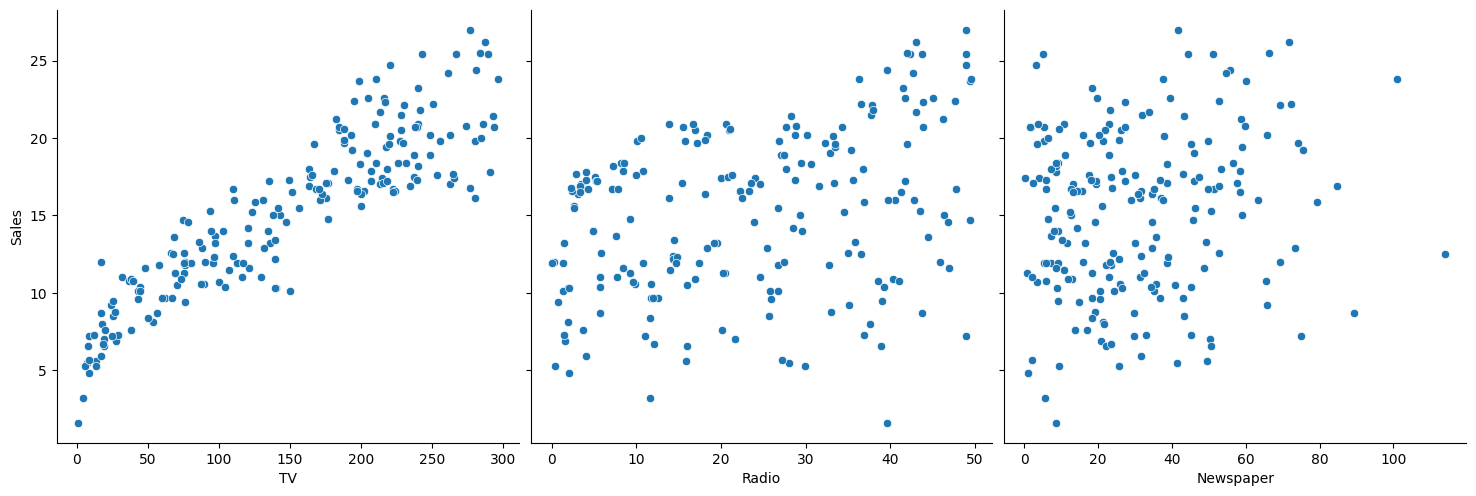

In [58]:
# Pairplot to visualize relationships between variables
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5)
plt.show()


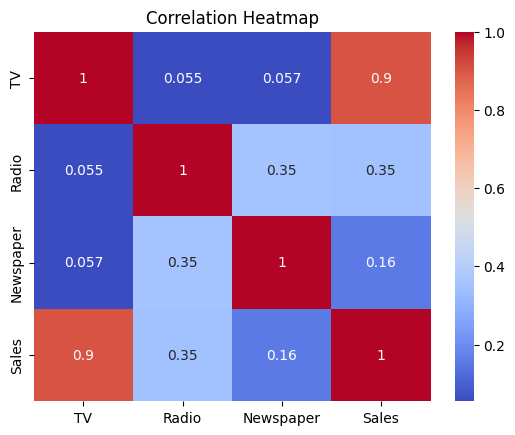

In [59]:
# Correlation heatmap to visualize correlation between variables
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


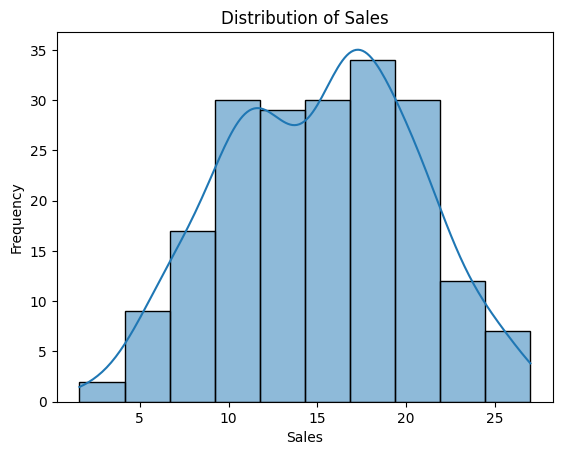

In [60]:
# Distribution of Sales
sns.histplot(data['Sales'], kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

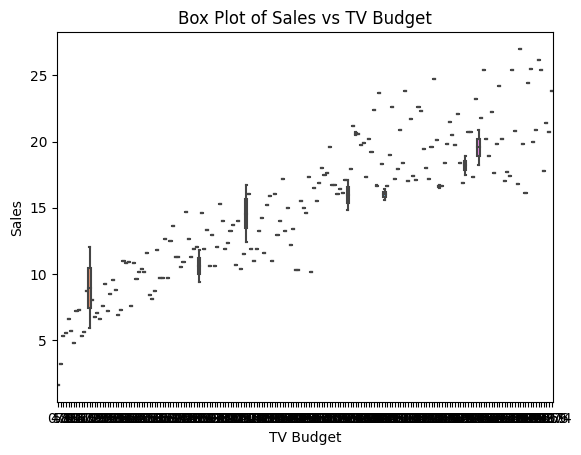

In [61]:
sns.boxplot(data=data, x='TV', y='Sales')
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.title('Box Plot of Sales vs TV Budget')
plt.show()

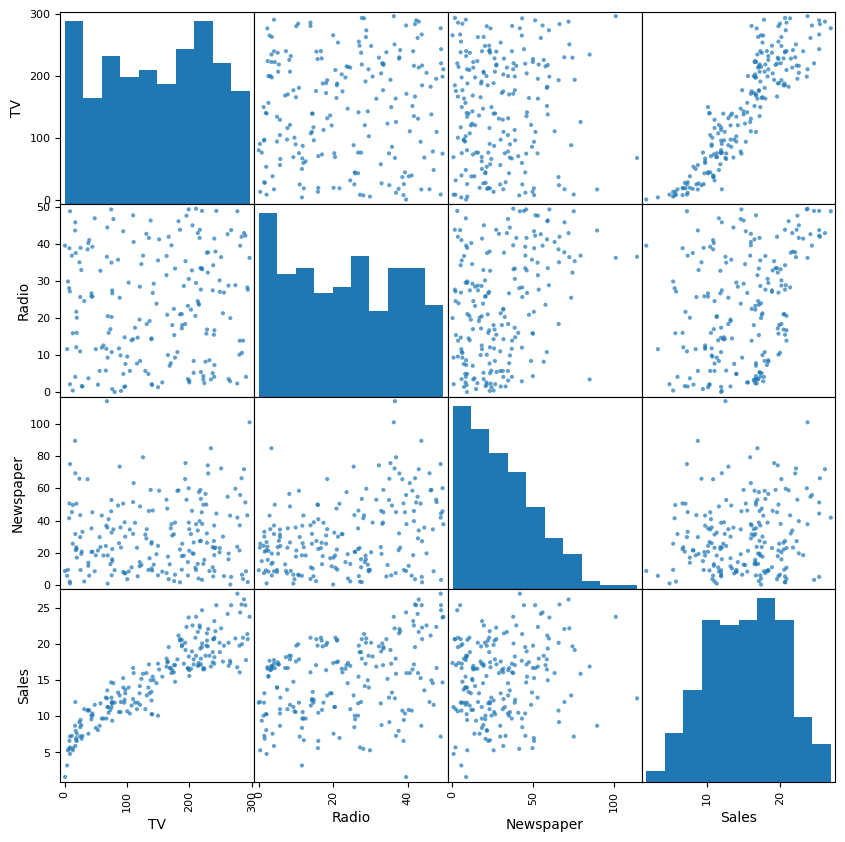

In [62]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.7, figsize=(10, 10), diagonal='hist')
plt.show()


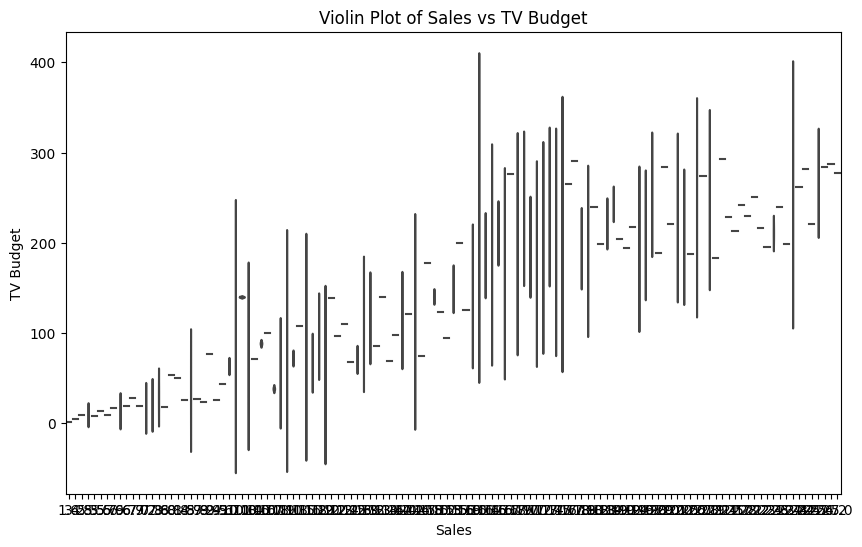

In [66]:
# Violin plot to visualize the distribution of 'Sales' for each advertising channel
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Sales', y='TV', inner='quart')
plt.xlabel('Sales')
plt.ylabel('TV Budget')
plt.title('Violin Plot of Sales vs TV Budget')
plt.show()

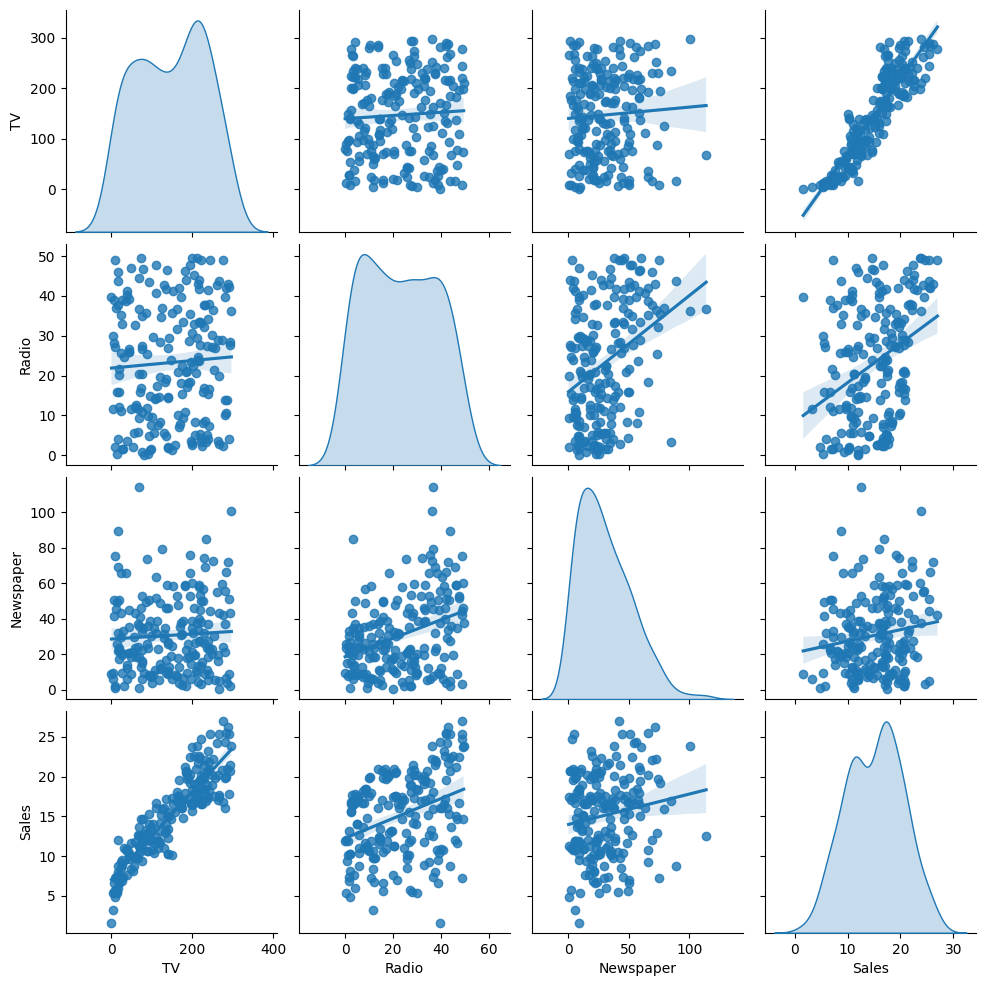

In [67]:
sns.pairplot(data, kind='reg', diag_kind='kde')
plt.show()


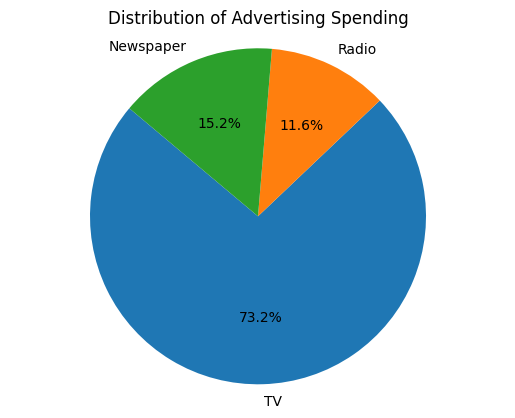

In [69]:
spending_totals = data[['TV', 'Radio', 'Newspaper']].sum()
labels = spending_totals.index
plt.pie(spending_totals, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Advertising Spending')
plt.show()


**SPLIT THE DATA**

In [14]:

# Split the data into features (X) and target (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**MODELING THE DATA**

MODEL 1 - LINEAR REGRESSION

In [16]:

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:

# Make predictions on the test set
y_pred = model.predict(X_test)


In [18]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [19]:

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 2.9077569102710896
R-squared (R2) Score: 0.9059011844150826


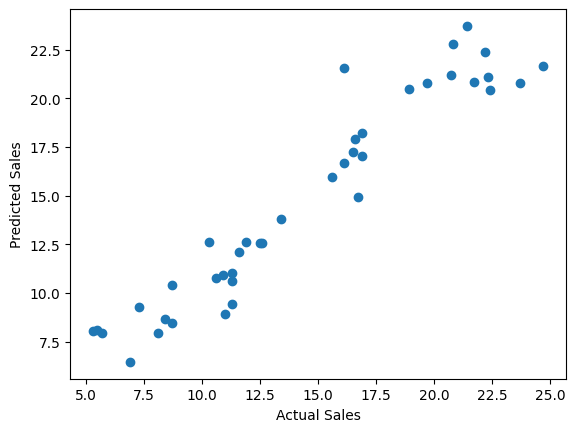

In [20]:

# Visualize the relationship between predicted and actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


**MODEL-2 -RANDOM FOREST REGRESSION**

In [53]:

# Create and train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [54]:

# Make predictions on the test set
y_pred = model.predict(X_test)

In [55]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [56]:


# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')


Mean Squared Error: 1.4374328500000009
R-squared (R2) Score: 0.9534827934927883


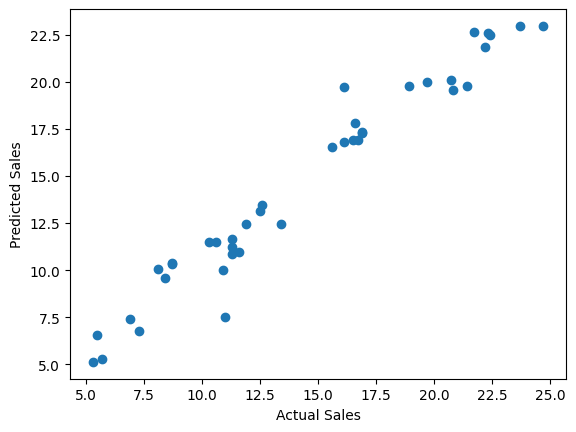

In [57]:


# Visualize the relationship between predicted and actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


**MODEL-3 - SVR**

In [48]:
# Create and train a Support Vector Machine Regressor model
model = SVR(kernel='linear', C=1.0)
model.fit(X_train, y_train)


SVR(kernel='linear')

In [49]:

# Make predictions on the test set
y_pred = model.predict(X_test)


In [50]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [51]:

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')


Mean Squared Error: 2.8153634623483095
R-squared (R2) Score: 0.9088911571967241


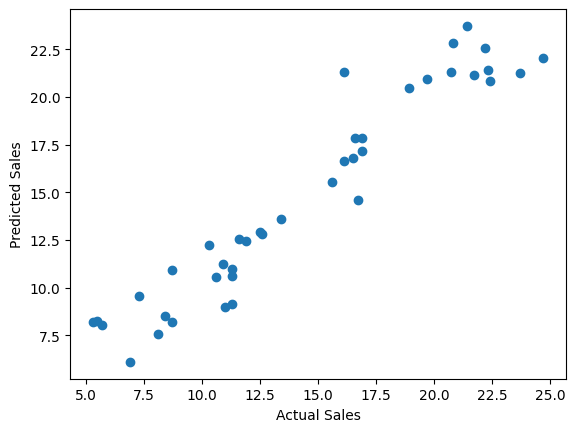

In [52]:

# Visualize the relationship between predicted and actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

**MODEL-4 - Gradient Boosting Regressor**

In [43]:
# Create and train a Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [44]:

# Make predictions on the test set
y_pred = model.predict(X_test)


In [45]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [46]:

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')


Mean Squared Error: 1.255260979893099
R-squared (R2) Score: 0.9593781134039533


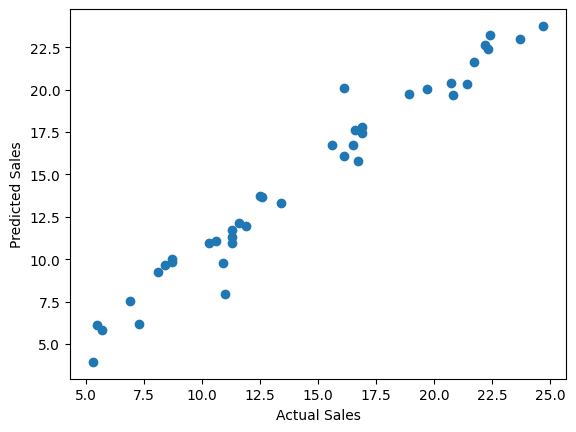

In [47]:

# Visualize the relationship between predicted and actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

**MODEL-5 - KNN**

In [38]:
# Create and train a K-Nearest Neighbors (KNN) Regressor model
model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
model.fit(X_train, y_train)


KNeighborsRegressor()

In [39]:

# Make predictions on the test set
y_pred = model.predict(X_test)


In [40]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



In [41]:

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')


Mean Squared Error: 3.115529999999999
R-squared (R2) Score: 0.8991773755626823


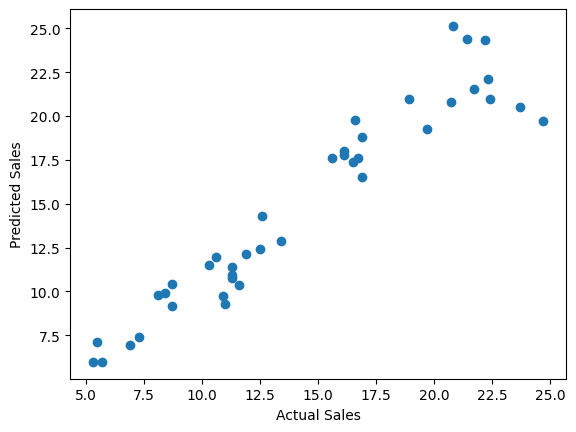

In [42]:

# Visualize the relationship between predicted and actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()



**MODEL COMPARISON**

In [31]:
# Create and train models for all five algorithms
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine Regressor': SVR(kernel='linear', C=1.0),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(n_neighbors=5)
}


In [32]:
results = {}  # Store evaluation metrics for each model

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R-squared (R2)': r2
    }


In [33]:


# Print the evaluation results for each model
for model_name, metrics in results.items():
    print(f'Model: {model_name}')
    print(f'Mean Squared Error (MSE): {metrics["MSE"]}')
    print(f'Root Mean Squared Error (RMSE): {metrics["RMSE"]}')
    print(f'R-squared (R2) Score: {metrics["R-squared (R2)"]}')
    print('------------------------')


Model: Linear Regression
Mean Squared Error (MSE): 2.9077569102710896
Root Mean Squared Error (RMSE): 1.7052146229349223
R-squared (R2) Score: 0.9059011844150826
------------------------
Model: Random Forest Regressor
Mean Squared Error (MSE): 1.4374328500000009
Root Mean Squared Error (RMSE): 1.1989298770153327
R-squared (R2) Score: 0.9534827934927883
------------------------
Model: Support Vector Machine Regressor
Mean Squared Error (MSE): 2.8153634623483095
Root Mean Squared Error (RMSE): 1.6779044854664134
R-squared (R2) Score: 0.9088911571967241
------------------------
Model: Gradient Boosting Regressor
Mean Squared Error (MSE): 1.255260979893099
Root Mean Squared Error (RMSE): 1.1203843000922045
R-squared (R2) Score: 0.9593781134039533
------------------------
Model: K-Nearest Neighbors Regressor
Mean Squared Error (MSE): 3.115529999999999
Root Mean Squared Error (RMSE): 1.7650864001515616
R-squared (R2) Score: 0.8991773755626823
------------------------


In [34]:

# Determine which model has the lowest RMSE
best_model = min(results, key=lambda x: results[x]['RMSE'])
print(f'The best model in terms of RMSE is: {best_model}')

The best model in terms of RMSE is: Gradient Boosting Regressor


In [35]:
# Extract the RMSE values and model names
rmse_values = [metrics['RMSE'] for metrics in results.values()]
model_names = list(results.keys())


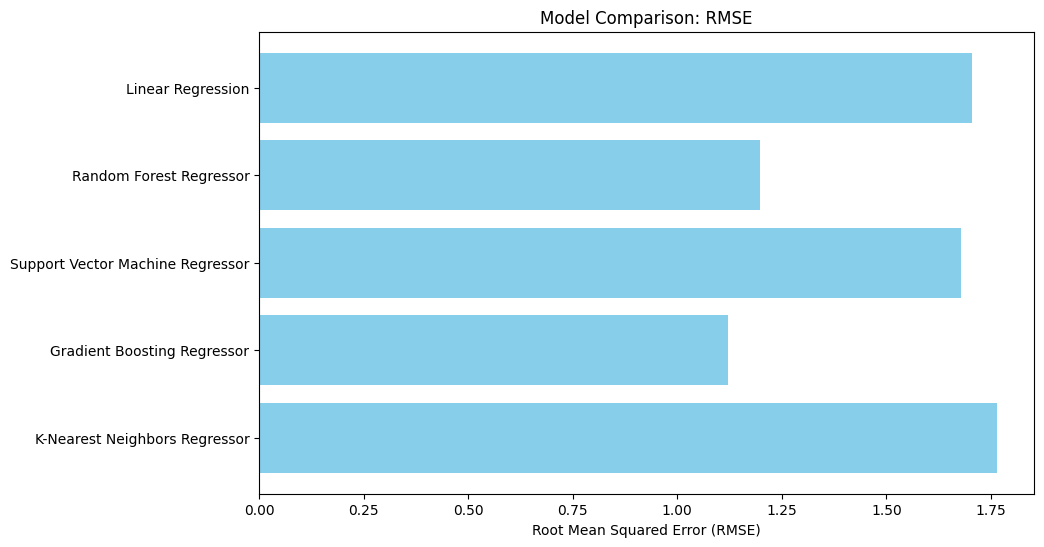

In [36]:

# Create a bar plot to compare RMSE values
plt.figure(figsize=(10, 6))
plt.barh(model_names, rmse_values, color='skyblue')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.title('Model Comparison: RMSE')
plt.gca().invert_yaxis()  # Invert the y-axis to show the best model on top
plt.show()


**BEST MODEL BY RMSE**

In [37]:

# Determine which model has the lowest RMSE
best_model = min(results, key=lambda x: results[x]['RMSE'])
print(f'The best model in terms of RMSE is: {best_model}')

The best model in terms of RMSE is: Gradient Boosting Regressor
